# CS210 - PROJECT : MySleepProject


This  project is analysis of my personal sleep data and 3rd party weather data. The realation beetwen sleep data and weather data sucha as tempeteture, moonphase, analyze, humidity are going to be examined. Necessary data will be extract and will be created in need.



Below, you can find used set of features, provided in the dataset:
**Index:** Collected Dates

**steps:** Collected daily steps

**deepSleepTime:** Amount of deep sleep time in minutes

**shallowSleepTime:** Amount of shallow sleep time in minutes

**wakeTime:** Amount of awakeness in between sleeps during nights  in minutes

**start:** Date and time of starting to sleeping

**stop:** Date and time of starting to awaking

**feelslikemax:** Felt degree in a day

**stop:** Date and time of starting to awaking

**stop:** Date and time of starting to awaking

**stop:** Date and time of starting to awaking

**stop:** Date and time of starting to awaking




In [1]:
## 1) Import necessary libraries

In [2]:
import pandas as pd
import os
import seaborn as sns
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api as sm




## 2) Merge the Datasets

This part is going to be step by step.
Merge 3 parts of  weather data into 1 csv file.

Second calculate the total step by summing the daily steps

In [3]:

# Assuming all CSV files are in the same directory
directory_path = '/Users/saidildeniz/Downloads/cs210/weather_data'

# Get a list of all CSV files in the directory and sort them
csv_files = sorted([file for file in os.listdir(directory_path) if file.endswith('.csv')])

# Initialize an empty DataFrame to store the merged data
merged_data = pd.DataFrame()

# Loop through each CSV file and merge it into the DataFrame
for file in csv_files:
    file_path = os.path.join(directory_path, file)
    current_data = pd.read_csv(file_path)
    merged_data = pd.concat([merged_data, current_data], ignore_index=True)

# Drop 'name', 'snow,  'sealevelpressure, 'visibility, 'severerisk', 'icon' and 'stations columns
#merged_data = merged_data.drop(['name', 'snow',  'sealevelpressure', 'visibility', 'severerisk', 'icon', 'stations'], axis=1)


# Save the merged DataFrame to a new CSV file
merged_data.to_csv('/Users/saidildeniz/Downloads/cs210/weather_data.csv', index=False)


In [4]:


# Specify the folder where your CSV files are located
folder_path = '/Users/saidildeniz/Downloads/cs210/3032393603_activity'

# List all CSV files in the specified folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the combined results
combined_results = pd.DataFrame()

# Iterate through each CSV file
for csv_file in csv_files:
    # Read the CSV file into a pandas DataFrame with semicolon as the delimiter
    df = pd.read_csv(os.path.join(folder_path, csv_file))

    # Print the column names to identify the correct column names
    print(df.columns)

    # Try to find the 'date' column case-insensitively
    date_column = next((col for col in df.columns if 'date' in col.lower()), None)

    if date_column is not None:
        # Convert the 'date' column to datetime format
        df[date_column] = pd.to_datetime(df[date_column])

        # Assuming the 'steps' information is in a single cell
        # You may need to adjust this based on the actual structure of your data
        df['steps'] = df['steps'].apply(lambda x: sum(map(int, str(x).split(','))) if pd.notnull(x) else 0)

        # Group the DataFrame by date and sum the 'steps' for each date
        summed_data = df.groupby(date_column)['steps'].sum().reset_index()

        # Append the results to the combined DataFrame
        combined_results = pd.concat([combined_results, summed_data], ignore_index=True)

    else:
        print(f"Column 'date' not found in the DataFrame for file: {csv_file}")

# Save the combined results to a new CSV file
combined_results.to_csv('/Users/saidildeniz/Downloads/cs210/activity.csv', index=False)


Index(['date', 'start', 'stop', 'distance', 'calories', 'steps'], dtype='object')
Index(['date', 'start', 'stop', 'distance', 'calories', 'steps'], dtype='object')
Index(['date', 'start', 'stop', 'distance', 'calories', 'steps'], dtype='object')
Index(['date', 'start', 'stop', 'distance', 'calories', 'steps'], dtype='object')


Third concatanes sleep data into 1 .CSV file.

In [5]:


# Specify the folder where your sleep CSV files are located
sleep_folder_path = '/Users/saidildeniz/Downloads/cs210/3032393603_sleep'

# List all sleep CSV files in the specified folder and sort them
sleep_csv_files = sorted([file for file in os.listdir(sleep_folder_path) if file.endswith('.csv')])

# Initialize an empty DataFrame to store the combined sleep data
combined_sleep_data = pd.DataFrame()

# Iterate through each sleep CSV file
for sleep_csv_file in sleep_csv_files:
    # Read the sleep CSV file into a pandas DataFrame
    sleep_df = pd.read_csv(os.path.join(sleep_folder_path, sleep_csv_file))

    # Print the column names to identify the correct column names
    print(sleep_df.columns)

    # Append the results to the combined sleep DataFrame
    combined_sleep_data = pd.concat([combined_sleep_data, sleep_df], ignore_index=True)

# Save the combined sleep data to a new CSV file
combined_sleep_data.to_csv('/Users/saidildeniz/Downloads/cs210/sleep.csv', index=False)


Index(['date', 'deepSleepTime', 'shallowSleepTime', 'wakeTime', 'start',
       'stop', 'REMTime', 'naps'],
      dtype='object')
Index(['date', 'deepSleepTime', 'shallowSleepTime', 'wakeTime', 'start',
       'stop', 'REMTime', 'naps'],
      dtype='object')
Index(['date', 'deepSleepTime', 'shallowSleepTime', 'wakeTime', 'start',
       'stop', 'REMTime', 'naps'],
      dtype='object')
Index(['date', 'deepSleepTime', 'shallowSleepTime', 'wakeTime', 'start',
       'stop', 'REMTime', 'naps'],
      dtype='object')



Fourth merge the sleep and activity datas into 1 .CSV

In [6]:

# Read the CSV files into DataFrames
activity_df = pd.read_csv('/Users/saidildeniz/Downloads/cs210/activity.csv')
sleep_df = pd.read_csv('/Users/saidildeniz/Downloads/cs210/sleep.csv')

# Merge the DataFrames on the "date" column
merged_df = pd.merge(activity_df, sleep_df, on='date')

# Drop the "REMTime" and "naps" columns
merged_df = merged_df.drop(['REMTime', 'naps'], axis=1)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('/Users/saidildeniz/Downloads/cs210/merged_data.csv', index=False)


Fifth since this is my personal data I know that my data is not collected every day since I dont wear wirstband evey time, fill the empty rows.

In [7]:

# Load the CSV file into a DataFrame
file_path = '/Users/saidildeniz/Downloads/cs210/merged_data.csv'
df = pd.read_csv(file_path)

# Assuming your DataFrame has a column named 'date' representing the dates
# Convert the 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Remove duplicates based on the 'date' column
df = df.drop_duplicates(subset='date')

# Create a range of dates covering the entire period in your data
date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')

# Reindex the DataFrame with the complete date range
df = df.set_index('date').reindex(date_range).reset_index()

# If you want to fill missing values with N/A
df = df.fillna('N/A')


# Save the updated DataFrame back to a CSV file
df.to_csv('/Users/saidildeniz/Downloads/cs210/merged_data_updated.csv', index=False)


In [8]:

# Load the weather_data.csv file with proper column separation
weather_data = pd.read_csv('/Users/saidildeniz/Downloads/cs210/weather_data.csv', sep=',')

# Drop the 1st and 11th rows
weather_data = weather_data.drop([1, 9])

# Load the merged_data_updated.csv file
merged_data = pd.read_csv('/Users/saidildeniz/Downloads/cs210/merged_data_updated.csv')

# Merge the two DataFrames
result = pd.merge(merged_data, weather_data, how='outer', left_index=True, right_index=True)

# Save the merged result to a new CSV file
result.to_csv('/Users/saidildeniz/Downloads/cs210/merged_data_final.csv', index=False)


Spotify Track Img, Song Preview columns may not be in the data we got from scraping, but we will not use these columns. So you can ignore this columns.

## 2) Create needed new  datas (5 pts)
Daytime, SleepDuration, , Season, Month, DayOfWeek,   datas to be added to dataset


In [9]:

# Read your existing CSV file into a DataFrame
file_path = '/Users/saidildeniz/Downloads/cs210/merged_data_final.csv'
df = pd.read_csv(file_path)

# Assuming 'index' column contains the date information
df['index'] = pd.to_datetime(df['index'])

# Extracting season information
df['Season'] = (df['index'].dt.month % 12 + 3) // 3
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}
df['Season'] = df['Season'].map(season_mapping)

# Extracting month information
df['Month'] = df['index'].dt.strftime('%B')

# Extracting day of the week information
df['DaysOfWeek'] = df['index'].dt.strftime('%A')


# Calculate the 'SleepDuration' column
df['SleepDuration'] = df['deepSleepTime'] + df['shallowSleepTime'] - df['wakeTime']

# Assuming your DataFrame is named 'df'
df['MoonName'] = df['moonphase'].apply(lambda x: 'New Moon' if x == 0.0 else ('Full Moon' if x == 0.5 else ''))


# Function to extract time from datetime string
def extract_time(datetime_str):
    return datetime_str[-8:]

# Apply the function to extract time from "sunrise" and "sunset" columns
df['sunrise'] = df['sunrise'].apply(lambda x: extract_time(str(x)) if pd.notna(x) else x)
df['sunset'] = df['sunset'].apply(lambda x: extract_time(str(x)) if pd.notna(x) else x)

# Convert 'sunrise' and 'sunset' columns to datetime format
df['sunrise'] = pd.to_datetime(df['sunrise'], format='%H:%M:%S', errors='coerce')
df['sunset'] = pd.to_datetime(df['sunset'], format='%H:%M:%S', errors='coerce')

# Calculate the new 'daytime' column
df['daytime'] = df['sunset'] - df['sunrise']

# Extract only the hour part from the 'daytime' column and convert it to hours, minutes, and seconds
df['DaytimeHours'] = df['daytime'].dt.total_seconds().apply(lambda x: f'{int(x // 3600):02}:{int((x % 3600) // 60):02}:{int(x % 60):02}' if not pd.isnull(x) else None)


# Save the updated DataFrame back to the CSV file
df.to_csv('/Users/saidildeniz/Downloads/cs210/merged_data_final.csv', index=False)


# Displaying the resulting DataFrame
print(df[['index', 'Season', 'Month', 'DaysOfWeek', 'SleepDuration', 'MoonName', 'DaytimeHours']])


          index  Season      Month DaysOfWeek  SleepDuration  MoonName  \
0    2019-09-24  Autumn  September    Tuesday            0.0             
1    2019-09-25  Autumn  September  Wednesday          474.0             
2    2019-09-26  Autumn  September   Thursday          470.0             
3    2019-09-27  Autumn  September     Friday          429.0             
4    2019-09-28  Autumn  September   Saturday          431.0  New Moon   
...         ...     ...        ...        ...            ...       ...   
1570 2024-01-11  Winter    January   Thursday          314.0             
1571 2024-01-12  Winter    January     Friday          477.0             
1572 2024-01-13  Winter    January   Saturday          398.0             
1573 2024-01-14  Winter    January     Sunday          456.0             
1574 2024-01-15  Winter    January     Monday            0.0             

     DaytimeHours  
0        12:05:52  
1            None  
2        12:00:29  
3        11:57:47  
4        11

In [10]:

# Assuming 'your_dataframe' is the variable containing your DataFrame
# Replace 'your_dataframe' with the actual variable name in your code

# Convert 'start' and 'stop' columns to datetime format
df['start'] = pd.to_datetime(df['start'])
df['stop'] = pd.to_datetime(df['stop'])

# Extract the time information and convert to hour format
df['StartHour'] = df['start'].dt.strftime('%H:%M')
df['StopHour'] = df['stop'].dt.strftime('%H:%M')

# Save the updated DataFrame back to the CSV file
df.to_csv('/Users/saidildeniz/Downloads/cs210/merged_data_final.csv', index=False)

# Display the updated DataFrame
print(df[['start', 'StartHour', 'stop', 'StopHour']])


                         start StartHour                      stop StopHour
0    2019-09-22 21:00:00+00:00     21:00 2019-09-22 21:00:00+00:00    21:00
1    2019-09-24 22:10:00+00:00     22:10 2019-09-25 06:04:00+00:00    06:04
2    2019-09-25 22:26:00+00:00     22:26 2019-09-26 06:22:00+00:00    06:22
3    2019-09-26 21:56:00+00:00     21:56 2019-09-27 05:05:00+00:00    05:05
4    2019-09-27 21:29:00+00:00     21:29 2019-09-28 04:40:00+00:00    04:40
...                        ...       ...                       ...      ...
1570 2024-01-10 23:46:00+00:00     23:46 2024-01-11 05:00:00+00:00    05:00
1571 2024-01-12 00:32:00+00:00     00:32 2024-01-12 08:29:00+00:00    08:29
1572 2024-01-12 22:46:00+00:00     22:46 2024-01-13 05:24:00+00:00    05:24
1573 2024-01-13 23:35:00+00:00     23:35 2024-01-14 07:11:00+00:00    07:11
1574 2024-01-13 21:00:00+00:00     21:00 2024-01-13 21:00:00+00:00    21:00

[1575 rows x 4 columns]


## Q3: Exploring the Dataset 

In [11]:
# Load the dataset
file_path = '/Users/saidildeniz/Downloads/cs210/merged_data_final.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify it's loaded correctly
print(data.head())
# Display the last few rows of the dataset to verify it's loaded correctly
print(data.tail())

        index    steps  deepSleepTime  shallowSleepTime  wakeTime  \
0  2019-09-24    125.0            0.0               0.0       0.0   
1  2019-09-25  10317.0           96.0             378.0       0.0   
2  2019-09-26   1307.0          103.0             370.0       3.0   
3  2019-09-27   1243.0          111.0             318.0       0.0   
4  2019-09-28   1517.0          148.0             283.0       0.0   

                       start                       stop    datetime  tempmax  \
0  2019-09-22 21:00:00+00:00  2019-09-22 21:00:00+00:00  2019-09-24     26.9   
1  2019-09-24 22:10:00+00:00  2019-09-25 06:04:00+00:00         NaN      NaN   
2  2019-09-25 22:26:00+00:00  2019-09-26 06:22:00+00:00  2019-09-26     24.9   
3  2019-09-26 21:56:00+00:00  2019-09-27 05:05:00+00:00  2019-09-27     23.1   
4  2019-09-27 21:29:00+00:00  2019-09-28 04:40:00+00:00  2019-09-28     24.6   

   tempmin  ...               icon  Season      Month  DaysOfWeek  \
0     14.0  ...               rain 

In [12]:
#1pts - show the info of dataframe
# Display DataFrame information
print("DataFrame Information:")
print(df.info())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   index             1575 non-null   datetime64[ns]     
 1   steps             1068 non-null   float64            
 2   deepSleepTime     1068 non-null   float64            
 3   shallowSleepTime  1068 non-null   float64            
 4   wakeTime          1068 non-null   float64            
 5   start             1068 non-null   datetime64[ns, UTC]
 6   stop              1068 non-null   datetime64[ns, UTC]
 7   datetime          1573 non-null   object             
 8   tempmax           1573 non-null   float64            
 9   tempmin           1573 non-null   float64            
 10  temp              1573 non-null   float64            
 11  feelslikemax      1573 non-null   float64            
 12  feelslikemin      1573 non-null   float

start, stop, datetime columns must be in datetime64[ns] format and sunrise and sunset columns must be in

In [13]:

# Read the CSV file into a pandas DataFrame

# Convert 'datetime' column to date format, handling errors gracefully
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d', errors='coerce')


# Save the updated DataFrame back to the CSV file
df.to_csv('/Users/saidildeniz/Downloads/cs210/merged_data_final.csv', index=False)

# Display the updated DataFrame
print(df)


          index    steps  deepSleepTime  shallowSleepTime  wakeTime  \
0    2019-09-24    125.0            0.0               0.0       0.0   
1    2019-09-25  10317.0           96.0             378.0       0.0   
2    2019-09-26   1307.0          103.0             370.0       3.0   
3    2019-09-27   1243.0          111.0             318.0       0.0   
4    2019-09-28   1517.0          148.0             283.0       0.0   
...         ...      ...            ...               ...       ...   
1570 2024-01-11   4760.0           13.0             301.0       0.0   
1571 2024-01-12   2493.0           49.0             428.0       0.0   
1572 2024-01-13   3682.0           85.0             313.0       0.0   
1573 2024-01-14   5601.0           95.0             361.0       0.0   
1574 2024-01-15   1227.0            0.0               0.0       0.0   

                         start                      stop   datetime  tempmax  \
0    2019-09-22 21:00:00+00:00 2019-09-22 21:00:00+00:00 2019-09-24

In [14]:
# Display statistical summary of numerical columns
print("Statistical Summary of Numerical Columns:")
print(df.describe())

Statistical Summary of Numerical Columns:
                     index         steps  deepSleepTime  shallowSleepTime  \
count                 1575   1068.000000    1068.000000       1068.000000   
mean   2021-11-19 00:00:00   4945.382959     104.180712        252.630150   
min    2019-09-24 00:00:00     59.000000       0.000000          0.000000   
25%    2020-10-21 12:00:00   2174.000000      69.750000        212.750000   
50%    2021-11-19 00:00:00   4047.000000     117.000000        290.000000   
75%    2022-12-17 12:00:00   6612.500000     147.000000        338.250000   
max    2024-01-15 00:00:00  24684.000000     491.000000        877.000000   
std                    NaN   3788.853158      63.625030        140.892432   

          wakeTime                       datetime      tempmax      tempmin  \
count  1068.000000                           1573  1573.000000  1573.000000   
mean      3.224719  2021-11-19 23:51:45.657978368    19.748442    12.082899   
min       0.000000         

Let's learn more about our dataset. There are various genres in playlists but some of them are more frequent than others. Your task is to determine the top 10 most frequent genres present in the data. Please consider that some songs have multiple genres. And at the end print top 10 genres with their counts.

In [15]:

missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Handle missing values for numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
# Save the updated DataFrame back to the CSV file
df.to_csv('/Users/saidildeniz/Downloads/cs210/merged_data_final.csv', index=False)

# Display the first 5 rows after handling missing values and encoding categorical labels
print("\nFirst 5 rows after preprocessing:")
print(data.head())







Missing Values:
index                  0
steps                507
deepSleepTime        507
shallowSleepTime     507
wakeTime             507
start                507
stop                 507
datetime               2
tempmax                2
tempmin                2
temp                   2
feelslikemax           2
feelslikemin           2
feelslike              2
humidity               2
precip                 2
precipprob             2
precipcover            2
preciptype           764
snow                  10
snowdepth              2
windgust               3
winddir                2
sealevelpressure       3
cloudcover             2
visibility             2
solarradiation         2
solarenergy            2
uvindex                2
severerisk           839
sunrise                2
sunset                 2
moonphase            746
sunelevation           2
icon                   2
Season                 0
Month                  0
DaysOfWeek             0
SleepDuration        507
MoonName

In [16]:

data = data.dropna(subset=['steps', 'start' ,'temp', 'datetime', 'DaytimeHours'])

data = data.interpolate()

missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)
# Save the updated DataFrame back to the CSV file
df.to_csv('/Users/saidildeniz/Downloads/cs210/merged_data_final.csv', index=False)

# Display the first 5 and last 5 rows after handling missing values and encoding categorical labels
print("\nFirst 5 rows after preprocessing:")
print(data.head())
print("\Last 5 rows after preprocessing:")
print(data.tail())





Missing Values:
index                  0
steps                  0
deepSleepTime          0
shallowSleepTime       0
wakeTime               0
start                  0
stop                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype           502
snow                   0
snowdepth              0
windgust               0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk             0
sunrise                0
sunset                 0
moonphase              0
sunelevation           0
icon                   0
Season                 0
Month                  0
DaysOfWeek             0
SleepDuration          0
MoonName

/var/folders/rc/13jhh8jd7ws0z543m_6qdk5h0000gn/T/ipykernel_31953/684205432.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data = data.interpolate()


Still there is missing values like in DaytimeHours so drop the missing rows

Let's make the analysis a little more detailed. Specifically, you are required to find and display the top 5 most popular music genres based on their average popularity score, but please only consider genres that appear more than 10 times in the dataset. And at the end print top_genres with their popularity score.

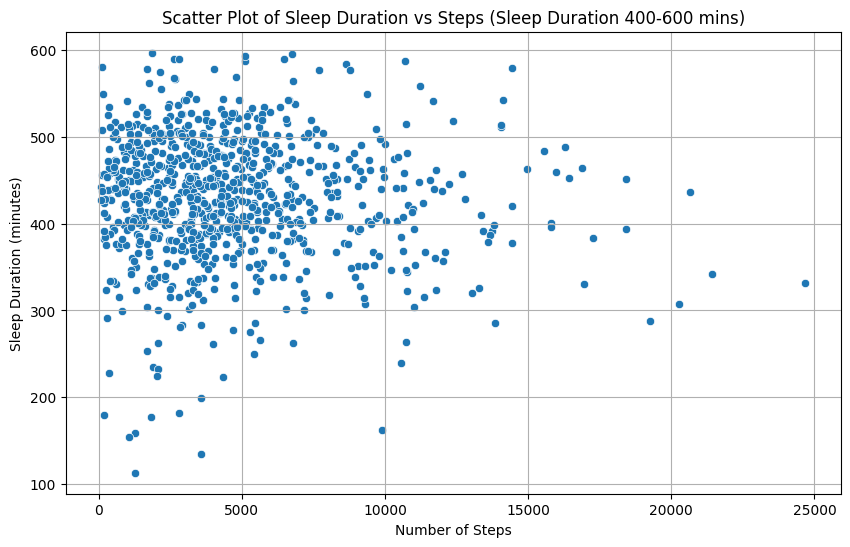

In [17]:




# Extract relevant columns
sleep_columns = ['deepSleepTime', 'shallowSleepTime', 'wakeTime', 'SleepDuration']
steps_column = 'steps'

# Filter data for sleep duration between 400 and 600 minutes
df_filtered = df[(df['SleepDuration'] >= 100) & (df['SleepDuration'] <= 600)]

# Calculate correlation between sleep duration and steps for filtered data
correlation_filtered = df_filtered['SleepDuration'].corr(df_filtered['steps'])

# Scatter plot for filtered data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtered['steps'], y=df_filtered['SleepDuration'])
plt.title(f'Scatter Plot of Sleep Duration vs Steps (Sleep Duration 400-600 mins)')
plt.xlabel('Number of Steps')
plt.ylabel('Sleep Duration (minutes)')
plt.grid(True)
plt.show()


If I take less than 5 thousand steps, I increase the optimum deep sleep time.

In [18]:
# Step 1: Read the CSV file into a Pandas DataFrame
df = pd.read_csv('/Users/saidildeniz/Downloads/cs210/merged_data_final.csv')

# Step 2: Convert 'Month' column to datetime format
# Assuming 'Month' is in a format like 'September'
df['Month'] = pd.to_datetime(df['Month'] + ' 1, 2022', format='%B %d, %Y')

# Step 3: Fill missing values with the mean of 'SleepDuration'
df['SleepDuration'] = df['SleepDuration'].fillna(df['SleepDuration'].mean())

# Convert sleep duration from minutes to hours
df['SleepDuration'] = df['SleepDuration'] / 60

# Step 4: Group by month and calculate mean of 'SleepDuration'
# Use custom order for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_mean = df.groupby(df['Month'].dt.strftime('%B'))['SleepDuration'].mean().reindex(month_order)

# Step 5: Visualize with Plotly
fig = px.bar(x=monthly_mean.index, y=monthly_mean.values, labels={'x': 'Month', 'y': 'Mean Sleep Duration (hours)'})
fig.update_layout(title='Monthly Mean Sleep Duration (In hour)')

# Add text labels on top of each bar
for i, value in enumerate(monthly_mean.values):
    fig.add_annotation(x=monthly_mean.index[i], y=value, text=f'{round(value, 1)} hours',
                       showarrow=True, arrowhead=4, arrowcolor='rgba(0,0,0,0)')

fig.show()


In [19]:
# Import necessary libraries
import pandas as pd
import plotly.express as px

# Step 1: Read the CSV file into a Pandas DataFrame
df = pd.read_csv('/Users/saidildeniz/Downloads/cs210/merged_data_final.csv')

# Step 2: Convert 'Month' column to datetime format
# Assuming 'Month' is in a format like 'September'
df['Month'] = pd.to_datetime(df['Month'] + ' 1, 2022', format='%B %d, %Y')

# Step 3: Fill missing values with the mean of 'SleepDuration'
df['SleepDuration'] = df['SleepDuration'].fillna(df['SleepDuration'].mean())

# Convert 'SleepDuration' from minutes to hours
df['SleepDuration'] = df['SleepDuration'] / 60

# Step 4: Group by season and calculate mean of 'SleepDuration'
# Define custom seasons and corresponding months
seasons_mapping = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Autumn': [9, 10, 11]
}

# Create a new 'Season' column based on the 'Month' column
df['Season'] = df['Month'].dt.month.map({month: season for season, months in seasons_mapping.items() for month in months})

# Calculate the mean sleep duration for each season
seasonly_mean = df.groupby('Season')['SleepDuration'].mean().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])

# Step 5: Visualize with Plotly
fig = px.bar(x=seasonly_mean.index, y=seasonly_mean.values, labels={'x': 'Season', 'y': 'Mean Sleep Duration (hours)'})
fig.update_layout(title='Seasonal Mean Sleep Duration (In hour)')

# Add text labels on top of each bar
for i, value in enumerate(seasonly_mean.values):
    fig.add_annotation(x=seasonly_mean.index[i], y=value, text=str(round(value, 1)),
                       showarrow=True, arrowhead=4, arrowcolor='rgba(0,0,0,0)')

fig.show()


On summer I am living more humid city than Istanbul that explains well.

In [20]:


# Load the CSV file
file_path = '/Users/saidildeniz/Downloads/cs210/merged_data_final.csv'
df = pd.read_csv(file_path)

# Drop rows where StartHour and StopHour are equal to '21:00'
df = df[df['StartHour'] != '21:00']
df = df[df['StopHour'] != '21:00']

# Drop rows with empty values
df = df.dropna(subset=['StartHour', 'StopHour'])

# Convert StartHour and StopHour to datetime objects for proper analysis
df['StartHour'] = pd.to_datetime(df['StartHour'], format='%H:%M')
df['StopHour'] = pd.to_datetime(df['StopHour'], format='%H:%M')

# Set the index to datetime columns
df_start_hour_filtered = df.set_index('StartHour').between_time('19:00', '23:59')
df_stop_hour_filtered = df.set_index('StopHour').between_time('04:00', '09:00')

# Reset the index for plotting
df_start_hour_filtered.reset_index(inplace=True)
df_stop_hour_filtered.reset_index(inplace=True)

# Create a heatmap for StartHour
fig_start_hour = px.density_heatmap(
    df_start_hour_filtered,
    x='StartHour',
    y=df_start_hour_filtered.index,
    marginal_x='histogram',
    marginal_y='histogram',
    title='Heatmap of StartHour',
    labels={'StartHour': 'Start Hour'},
)

# Create a heatmap for StopHour
fig_stop_hour = px.density_heatmap(
    df_stop_hour_filtered,
    x='StopHour',
    y=df_stop_hour_filtered.index,
    marginal_x='histogram',
    marginal_y='histogram',
    title='Heatmap of StopHour',
    labels={'StopHour': 'Stop Hour'},
)

# Show the plots
fig_start_hour.show()
fig_stop_hour.show()


Apparently I tend to sleep at 10 o'clock or 11 pm and finish my deep sleep at 4.30 and 5.30.

In [21]:


# Load the CSV file into a DataFrame
file_path = "/Users/saidildeniz/Downloads/cs210/merged_data_final.csv"
data = pd.read_csv(file_path)

# Assuming the DataFrame has columns 'Steps' and 'DeepSleep'
# Replace these with the actual column names from your CSV file
steps = data['steps']
deep_sleep = data['deepSleepTime']

# Create a stacked area plot with Plotly
fig = px.area(data, x=data.index, y=[steps, deep_sleep], labels={'value': 'Count'}, title='Relationship Between Walking and Deep Sleep')
fig.update_layout(xaxis_title='Time', yaxis_title='Count', legend_title_text='Activity')
fig.show()


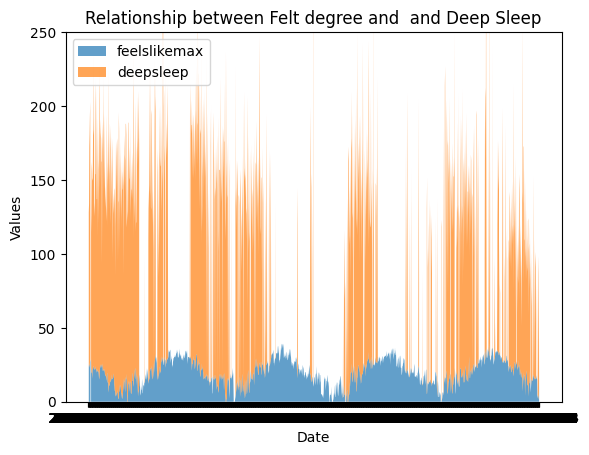

In [22]:


# Load the data
data = pd.read_csv('/Users/saidildeniz/Downloads/cs210/merged_data_final.csv')

# Assuming 'feelslikemax' and 'deepsleep' are column names in your CSV
x = data['index']  # Assuming there is a 'Date' column for the x-axis

# Plotting stacked area plot
plt.stackplot(x, data['feelslikemax'], data['deepSleepTime'], labels=['feelslikemax', 'deepsleep'], alpha=0.7)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Relationship between Felt degree and  and Deep Sleep')

# Set y-axis limits
plt.ylim(0, 250)

# Add legend
plt.legend(loc='upper left')

# Save the plot
plt.savefig('stacked_area_plot.png')

# Show the plot
plt.show()

import pandas as pd

# Load the data
data = pd.read_csv('/Users/saidildeniz/Downloads/cs210/merged_data_final.csv')



                            OLS Regression Results                            
Dep. Variable:          SleepDuration   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     32.66
Date:                Fri, 19 Jan 2024   Prob (F-statistic):           1.42e-08
Time:                        23:26:48   Log-Likelihood:                -7082.1
No. Observations:                1066   AIC:                         1.417e+04
Df Residuals:                    1064   BIC:                         1.418e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          429.0670     14.428     29.738   

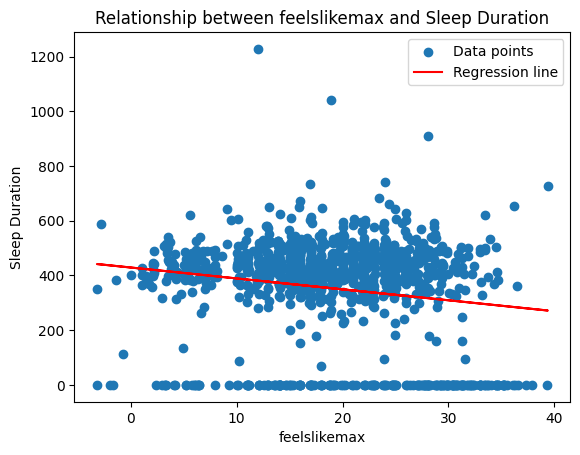

In [23]:


# Load the data
file_path = '/Users/saidildeniz/Downloads/cs210/merged_data_final.csv'
data = pd.read_csv(file_path)

# Select relevant columns
columns_of_interest = ['SleepDuration', 'uvindex', 'humidity', 'feelslikemax']
df = data[columns_of_interest]

# Drop rows with missing values
df = df.dropna()

# Add a constant term for the intercept
df['const'] = 1

# Specify the independent variable (temperature in this case)
independent_variable = 'feelslikemax'

# Fit the linear regression model
model = sm.OLS(df['SleepDuration'], df[['const', independent_variable]])
result = model.fit()

# Display the regression summary
print(result.summary())

# Calculate the percentage change in sleep duration for a 1-unit decrease in temperature
percentage_change = result.params[independent_variable] * -1 * 100
print(f"A 1-unit decrease in {independent_variable} is associated with a {percentage_change:.2f}% decrease in Sleep Duration.")

# Visualize the relationship
plt.scatter(df[independent_variable], df['SleepDuration'], label='Data points')
plt.plot(df[independent_variable], result.predict(df[['const', independent_variable]]), color='red', label='Regression line')
plt.xlabel(independent_variable)
plt.ylabel('Sleep Duration')
plt.title(f'Relationship between {independent_variable} and Sleep Duration')
plt.legend()
plt.show()


Mean Sleep Duration for all days: 5.89 hours
Mean Sleep Duration for days with increased steps: 6.36 hours
Percentage Change: 8.00%


/var/folders/rc/13jhh8jd7ws0z543m_6qdk5h0000gn/T/ipykernel_31953/3902013836.py:11: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/var/folders/rc/13jhh8jd7ws0z543m_6qdk5h0000gn/T/ipykernel_31953/3902013836.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



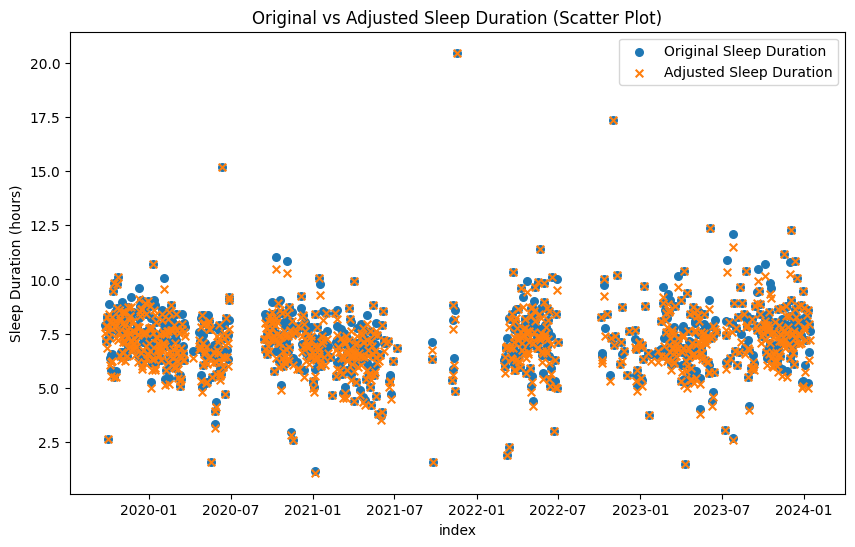

In [24]:


# Load the data from the CSV file
file_path = '/Users/saidildeniz/Downloads/cs210/merged_data_final.csv'
df = pd.read_csv(file_path)

# Make sure the data is sorted by date
df['index'] = pd.to_datetime(df['index'])
df = df.sort_values(by='index')

# Calculate the change in steps and the percentage change in sleep duration
df['StepsChange'] = df['steps'].diff()
df['SleepDurationChangePercent'] = df['SleepDuration'].pct_change() * 100

# Apply the condition and filter the data
condition = df['StepsChange'] > 0  # You can adjust this condition as needed
filtered_data = df[condition]

# Convert sleep duration from minutes to hours
df['SleepDuration'] /= 60
filtered_data['SleepDuration'] /= 60

# Calculate the mean sleep duration for the filtered data
mean_sleep_duration_all_days = df['SleepDuration'].mean()
mean_sleep_duration_filtered = filtered_data['SleepDuration'].mean()

# Calculate the percentage change in mean sleep duration
percent_change = ((mean_sleep_duration_filtered - mean_sleep_duration_all_days) / mean_sleep_duration_all_days) * 100

# Print the results
print(f"Mean Sleep Duration for all days: {mean_sleep_duration_all_days:.2f} hours")
print(f"Mean Sleep Duration for days with increased steps: {mean_sleep_duration_filtered:.2f} hours")
print(f"Percentage Change: {percent_change:.2f}%")

# Apply the specified decrease in sleep duration for visualization purposes
df['AdjustedSleepDuration'] = df['SleepDuration']
df.loc[condition, 'AdjustedSleepDuration'] *= 0.95  # Decrease by 5%

# Visualize the results using scatter plot
plt.figure(figsize=(10, 6))

# Filter out data points with 0 sleep duration for the original sleep duration
original_plot_data = df[df['SleepDuration'] > 0]
plt.scatter(original_plot_data['index'], original_plot_data['SleepDuration'], label='Original Sleep Duration', marker='o', s=30)

# Filter out data points with 0 sleep duration for the adjusted sleep duration
adjusted_plot_data = df[df['AdjustedSleepDuration'] > 0]
plt.scatter(adjusted_plot_data['index'], adjusted_plot_data['AdjustedSleepDuration'], label='Adjusted Sleep Duration', marker='x', s=30)

plt.xlabel('index')
plt.ylabel('Sleep Duration (hours)')
plt.title('Original vs Adjusted Sleep Duration (Scatter Plot)')
plt.legend()
plt.show()

